In [1]:
#Introduction
#The dataset is publically available on the Kaggle website,
#And it is from an ongoing ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. 
#The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).
#The dataset provides the patients’ information. 
#It includes over 4,000 records and 15 attributes.
#FEATURES
#sex:male or female;(Nominal)
#age: age of the patient;
    #(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
#currentSmoker: whether or not the patient is a current smoker (Nominal)
#cigsPerDay: the number of cigarettes that the person smoked on average in one day.
#(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)
#BPMeds: whether or not the patient was on blood pressure medication (Nominal)
#prevalentStroke: whether or not the patient had previously had a stroke (Nominal)
#prevalentHyp: whether or not the patient was hypertensive (Nominal)
#diabetes: whether or not the patient had diabetes (Nominal)
#totChol: total cholesterol level (Continuous)
#sysBP: systolic blood pressure (Continuous)
#diaBP: diastolic blood pressure (Continuous)
#BMI: Body Mass Index (Continuous)
#heartRate: heart rate(Continuous - In medical research, variables such as heart rate though in fact discrete,
#yet are considered continuous because of large number of possible values.)
#glucose: glucose level (Continuous)
#TenYearCHD:10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("framingham.csv")

In [4]:
data.shape

(4238, 16)

In [5]:
data.duplicated().sum()

0

In [6]:
data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
data.tail(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [8]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [10]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [12]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [13]:
data.drop('education', axis=1, inplace=True)

In [14]:
data.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [15]:
data.TenYearCHD.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

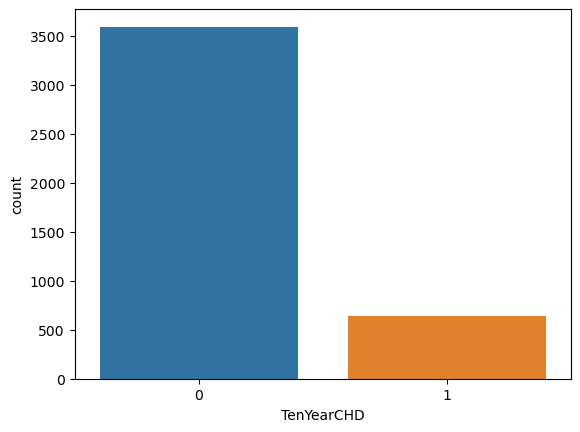

In [17]:
sns.countplot(x='TenYearCHD',data=data)

<AxesSubplot:>

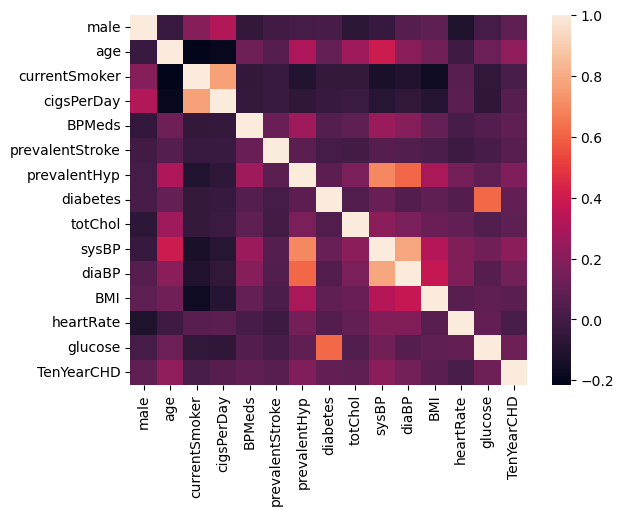

In [18]:
sns.heatmap(data.corr())

<AxesSubplot:xlabel='age', ylabel='count'>

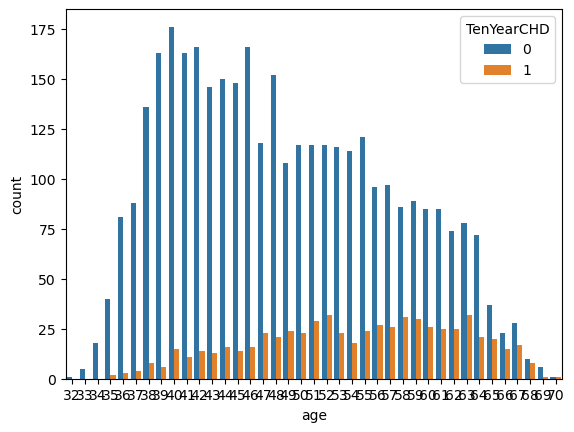

In [19]:
sns.countplot(data=data , x='age',hue="TenYearCHD")

<AxesSubplot:xlabel='totChol', ylabel='count'>

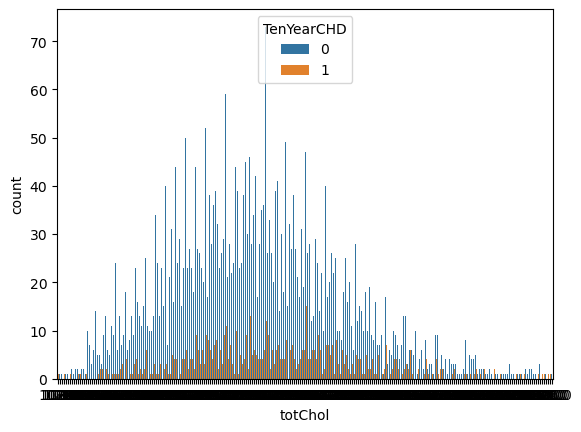

In [20]:
sns.countplot(data=data , x='totChol',hue="TenYearCHD")

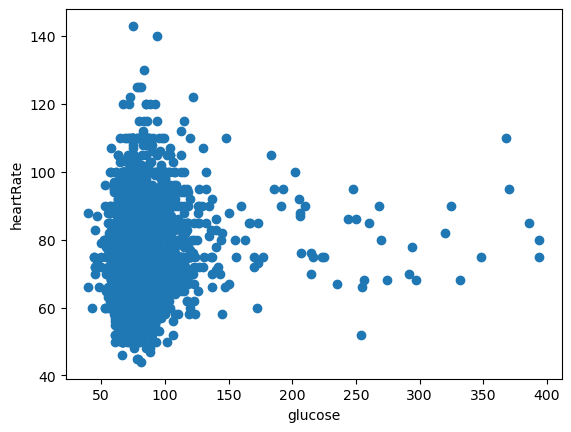

In [21]:
plt.scatter(data["glucose"], data["heartRate"])
plt.xlabel("glucose")
plt.ylabel("heartRate")
plt.show()

<AxesSubplot:xlabel='glucose'>

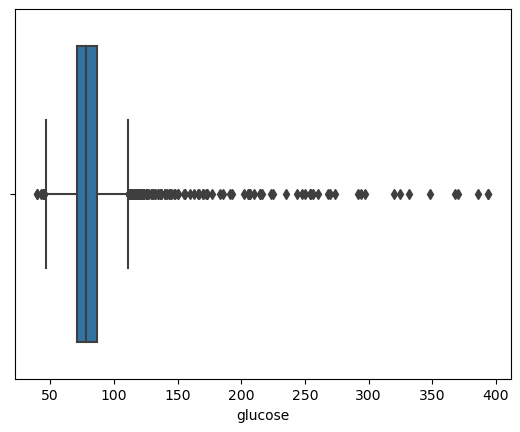

In [22]:
sns.boxplot(data['glucose'])

<AxesSubplot:xlabel='heartRate'>

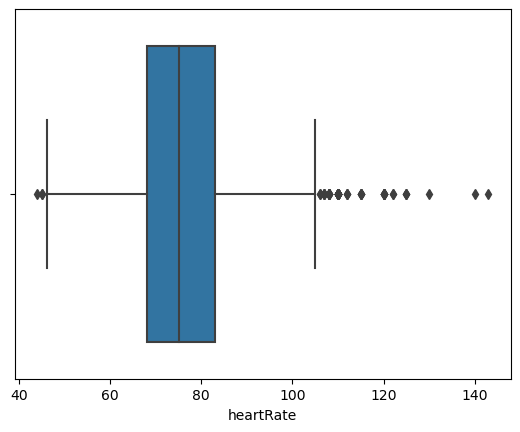

In [23]:
sns.boxplot(data['heartRate'])

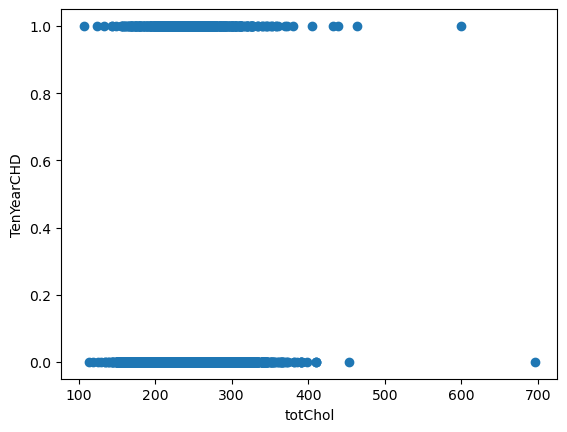

In [24]:
plt.scatter(data["totChol"], data["TenYearCHD"])
plt.xlabel("totChol")
plt.ylabel("TenYearCHD")
plt.show()

In [25]:
num_col = data.select_dtypes(include=['float64','int64','object']).columns

In [26]:
data = data[num_col].fillna(data[num_col].mean())

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4238 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4238 non-null   float64
 12  heartRate        4238 non-null   float64
 13  glucose          4238 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [28]:
from scipy import stats
z_scores = stats.zscore(data)

In [29]:
z_scores = stats.zscore(data)

In [30]:
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

In [31]:
newdata = data[~outliers]

In [32]:
np.log(newdata[newdata.columns])

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0.0,3.663562,-inf,-inf,-inf,-inf,-inf,-inf,5.273000,4.663439,4.248495,3.294725,4.382027,4.343805,-inf
1,-inf,3.828641,-inf,-inf,-inf,-inf,-inf,-inf,5.521461,4.795791,4.394449,3.357942,4.553877,4.330733,-inf
2,0.0,3.871201,0.0,2.995732,-inf,-inf,-inf,-inf,5.501258,4.848116,4.382027,3.232384,4.317488,4.248495,-inf
3,-inf,4.110874,0.0,3.401197,-inf,-inf,0.0,-inf,5.416100,5.010635,4.553877,3.352707,4.174387,4.634729,0.0
4,-inf,3.828641,0.0,3.135494,-inf,-inf,-inf,-inf,5.652489,4.867534,4.430817,3.139833,4.442651,4.442651,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,0.0,3.912023,0.0,0.000000,-inf,-inf,0.0,-inf,5.746203,5.187386,4.521789,3.256942,4.189655,4.454347,0.0
4234,0.0,3.931826,0.0,3.761200,-inf,-inf,-inf,-inf,5.332719,4.840242,4.382027,2.981126,4.174387,4.219508,-inf
4235,-inf,3.871201,0.0,2.995732,-3.51898,-inf,-inf,-inf,5.513429,4.875197,4.276666,3.091042,4.430817,4.454347,-inf
4236,-inf,3.784190,0.0,2.708050,-inf,-inf,-inf,-inf,5.347108,4.840242,4.465908,2.952825,4.454347,4.406314,-inf


In [33]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit_transform(newdata[newdata.columns])

array([[ 1.14062148, -1.19398839, -1.00809518, ...,  0.40580148,
        -0.21388411, -0.3937023 ],
       [-0.87671504, -0.36750387, -1.00809518, ...,  1.72021468,
        -0.29632041, -0.3937023 ],
       [ 1.14062148, -0.13136544,  0.99196982, ..., -0.03233625,
        -0.79093824, -0.3937023 ],
       ...,
       [-0.87671504, -0.13136544,  0.99196982, ...,  0.75631167,
         0.52804263, -0.3937023 ],
       [-0.87671504, -0.6036423 ,  0.99196982, ...,  0.93156676,
         0.19555667, -0.3937023 ],
       [-0.87671504,  0.34091143, -1.00809518, ...,  0.40580148,
         2.25920502, -0.3937023 ]])

In [34]:
x = newdata.drop('TenYearCHD', axis=1)
y = newdata['TenYearCHD']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [36]:
print(x_train.shape)
print(x_test.shape)

(2883, 14)
(962, 14)


In [37]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train , y_train)

GaussianNB()

In [38]:
train_preds = naive_bayes.predict(x_train)
test_preds = naive_bayes.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [40]:
confusion_matrix(y_train, train_preds)

array([[2264,  237],
       [ 289,   93]], dtype=int64)

In [41]:
train_accuracy=accuracy_score(y_train,train_preds)
print(train_accuracy)

0.8175511619840444


In [42]:
confusion_matrix(y_test, test_preds)

array([[750,  78],
       [100,  34]], dtype=int64)

In [43]:
test_accuracy=accuracy_score(y_test,test_preds)
print(test_accuracy)

0.814968814968815
